In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
dat = pd.read_csv('Q2raw.csv')

In [4]:
dat.shape

(6, 5)

In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
id                6 non-null int64
Good Behavior     6 non-null bool
Age < 30          6 non-null bool
Drug Dependent    6 non-null bool
Recidivist        6 non-null bool
dtypes: bool(4), int64(1)
memory usage: 152.0 bytes


In [10]:
dat = dat.drop('id', axis = 1)

In [11]:
dat

,Good Behavior,Age < 30,Drug Dependent,Recidivist
0,False,True,False,True
1,False,False,False,False
2,False,True,False,True
3,True,False,False,False
4,True,False,True,True
5,True,False,False,False


In [15]:
x = dat.drop('Recidivist', axis=1)
y = dat['Recidivist']

In [16]:
print(x)

   Good Behavior  Age < 30  Drug Dependent
0          False      True           False
1          False     False           False
2          False      True           False
3           True     False           False
4           True     False            True
5           True     False           False


In [17]:
print(y)

0     True
1    False
2     True
3    False
4     True
5    False
Name: Recidivist, dtype: bool


In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

In [18]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
tree_clf.classes_

array([False,  True])

In [20]:
tree_clf.get_depth()

2

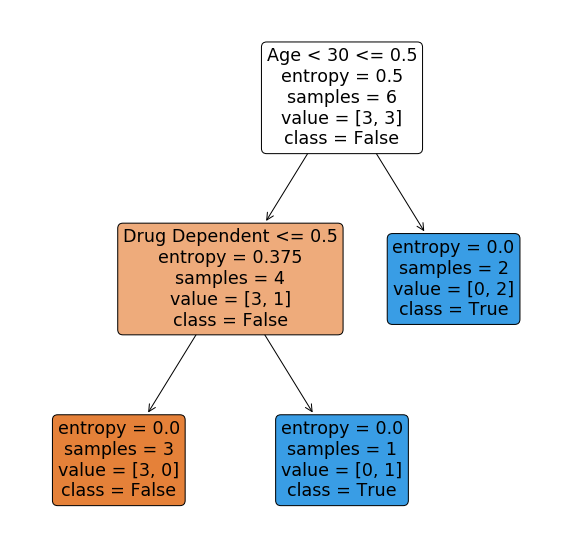

In [53]:
plt.figure(figsize = (10,10))
plot_tree(tree_clf, feature_names = x.columns, class_names = ['False', 'True'],
         impurity = True, filled = True, rounded = True)
plt.show()

In [45]:
from sklearn.tree.export import export_text

In [52]:
r = export_text(tree_clf, feature_names=['Good Behaviour', 'Age < 30', 'Drug Dependent'])
print(r)

|--- Age < 30 <= 0.50
|   |--- Drug Dependent <= 0.50
|   |   |--- class: False
|   |--- Drug Dependent >  0.50
|   |   |--- class: True
|--- Age < 30 >  0.50
|   |--- class: True

